# Dataset preparation and visualization

The goal of this notebook is to collect all relevant data into a single Pandas dataframe and perform some visualization.

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import itertools
import ast

Download the [MusicOSet dataset](https://marianaossilva.github.io/DSW2019/) and save in `../data`.

In [2]:
""" MusicOSet """

fp = "../data/musicoset_metadata/songs.csv"
df_songs_meta = pd.read_csv(fp, sep='\t')
print("SONGS")
print(df_songs_meta.head())

fp = "../data/musicoset_metadata/artists.csv"
df_artists_meta = pd.read_csv(fp, sep='\t')
print("\n---------------------\n")
print("ARTISTS")
print(df_artists_meta.head())

fp = "../data/musicoset_metadata/tracks.csv"
df_tracks_meta = pd.read_csv(fp, sep='\t')
print("\n---------------------\n")
print("TRACKS")
print(df_tracks_meta.head())

fp = "../data/musicoset_songfeatures/lyrics.csv"
df_lyrics = pd.read_csv(fp, sep='\t')
print("\n---------------------\n")
print("LYRICS")
print(df_lyrics.head())

fp = "../data/musicoset_songfeatures/acoustic_features.csv"
df_acoustic_features = pd.read_csv(fp, sep='\t')
print("\n---------------------\n")
print("ACOUSTIC FEATURES")
print(df_acoustic_features.head())


SONGS
                  song_id                                      song_name  \
0  3e9HZxeyfWwjeyPAMmWSSQ                                  thank u, next   
1  5p7ujcrUXASCNwRaWNHR1C                                     Without Me   
2  2xLMifQCjDGFmkHkpNLD9h                                     SICKO MODE   
3  3KkXRkHbMCARz0aVfEt68P  Sunflower - Spider-Man: Into the Spider-Verse   
4  1rqqCSm0Qe4I9rUvWncaom                                     High Hopes   

                                           billboard  \
0                 ('Thank U, Next', 'Ariana Grande')   
1                           ('Without Me', 'Halsey')   
2                     ('Sicko Mode', 'Travis Scott')   
3  ('Sunflower (Spider-Man: Into The Spider-Verse...   
4              ('High Hopes', 'Panic! At The Disco')   

                                             artists  popularity  explicit  \
0        {'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'}          86      True   
1               {'26VFTg2z8YR0cCuwLzESi2': '

Set index to song ID.

In [3]:
try:
    df_songs_meta = df_songs_meta.set_index('song_id')
except:
    # already done
    pass

try:
    df_tracks_meta = df_tracks_meta.set_index('song_id')
except:
    # already done
    pass

try:
    df_acoustic_features = df_acoustic_features.set_index('song_id')
except:
    # already done
    pass

# set song ID as index
try:
    df_lyrics = df_lyrics.set_index('song_id')
except:
    # already done
    pass

# 1) standardize lyrics

We remove bad entries, and clean up the lyrics by removing delimiters and annotations. 

In [4]:
# have some nan, lets remove
print(f"number of songs : {len(df_lyrics)}")
df_lyrics_clean = df_lyrics.dropna()
print(f"number of songs with lyrics : {len(df_lyrics_clean)}")

df_lyrics_clean.head()

number of songs : 20404
number of songs with lyrics : 19663


,lyrics
song_id,
3e9HZxeyfWwjeyPAMmWSSQ,['[Verse 1]\nThought I\'d end up with Sean\nBu...
5p7ujcrUXASCNwRaWNHR1C,"[""[Verse 1]\nFound you when your heart was bro..."
2xLMifQCjDGFmkHkpNLD9h,"['[Part I]\n\n[Intro: Drake]\nAstro, yeah\nSun..."
1rqqCSm0Qe4I9rUvWncaom,"[""[Intro]\nHigh, high hopes\n\n[Chorus]\nHad t..."
0bYg9bo50gSsH3LtXe2SQn,"[""[Intro]\nI-I-I don't want a lot for Christma..."


In [5]:
def find_between(s, first, last):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""


def standardize_lyrics(lyrics, i, verbose=False):
#     if verbose:
#         print(i)
    if lyrics is np.nan or len(lyrics) == 0:
        return np.nan
    
    # remove new lines
    clean = lyrics.replace("\\n\\n", ". ").replace("\\n", ". ").replace("\\", "")
    
    # remove square brackets around lyrics
    clean = clean[1:-1]
    
    # if possible, extract chorus, pre-chorus, post-chorus, bridge, verses
    song_parts = ["Chorus", "Pre-Chorus", "Post-Chorus", "Bridge", "Verse 1", "Verse 2", "Verse 3", "Verse 4"]
    if verbose:
        for part in song_parts:
            text = find_between(clean, f"[{part}]. ", "[")
            if len(text):
                print(f"\n{part} : {text}")
    
    for part in song_parts:
        clean = clean.replace(f"[{part}]. ", "")
        
        
    # remove anything else in square brackets
    clean = re.sub("[\[].*?[\]]", "", clean)
    
    # clean up
    clean = clean.replace('"', "")
    try:
        while clean[0] == "." or clean[0] == " " or clean[0] == "'":
            clean = clean[1:]
    except:
        return np.nan
    try:
        if clean[-1] == "'":
            clean = clean[:-1]
    except:
        return np.nan
        
    return clean


idx = 4   # 1, 19658
print(df_lyrics_clean["lyrics"][idx])
print()
lyrics_stand = standardize_lyrics(df_lyrics_clean["lyrics"][idx], 0, True)
print(f"\n\n{lyrics_stand}")

["[Intro]\nI-I-I don't want a lot for Christmas\nThere is just one thing I need\nI don't care about the presents\nUnderneath the Christmas tree\nI just want you for my own\nMore than you could ever know\nMake my wish come true\nAll I want for Christmas is you, yeah\n\n[Verse 1]\nI don't want a lot for Christmas\nThere is just one thing I need (And I)\nDon't care about the presents\nUnderneath the Christmas tree\nI don't need to hang my stocking\nThere upon the fireplace (I)\nSanta Claus won't make me happy\nWith a toy on Christmas Day\n\n[Chorus]\nI just want you for my own (ooh, ooh, ooh)\nMore than you could ever know (oh, oh, oh)\nMake my wish come true\nAll I want for Christmas is you\nYou, baby\n\n[Verse 2]\nOh, I won't ask for much this Christmas\nI won't even wish for snow (And I)\nI'm just going to keep on waiting\nUnderneath the mistletoe\nI won't make a list and send it\nTo the North Pole for Saint Nick (I)\nI won't even stay awake to\nHear those magic reindeer click\n\n[Chor

In [6]:
# standardize all lyrics
df_lyrics_stand = df_lyrics_clean.copy()
df_lyrics_stand['lyrics'] = df_lyrics_stand['lyrics'].apply(standardize_lyrics, args=(0, False))
df_lyrics_stand.head()

,lyrics
song_id,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'..."
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes..."
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...


In [7]:
# drop any more NAN (instrumental songs / bad lyrics parsing)
print(f"before : {len(df_lyrics_stand)}")
df_lyrics_stand_2 = df_lyrics_stand.dropna()
print(f"after : {len(df_lyrics_stand_2)}")

before : 19663
after : 19607


In [8]:
# some weird examples from bad dataset collections....
song_id = "1SssFw74DdHVjRa6ADggdD"
lyrics = df_lyrics_stand_2.loc[song_id]["lyrics"]
print(len(lyrics))
print(df_lyrics_stand_2.loc[song_id].lyrics.count("–"))
print(lyrics)

30360
805
825 ALL NIGHT – PAROV STELAR. 824 BIG JET PLANE – ANGUS & JULIA STONE. 823 SWINGS BOTH WAYS – ROBBIE WILLIAMS. FEATURING RUFUS WAINWRIGHT. 822 GELOBTES LAND – PETER MAFFAY. 821 JUST LIKE YOU – ANDREAS KÜMMERT. 820 SHOUT TO THE TOP – THE STYLE COUNCIL. 819 ONE DAY (VANDAAG) – BAKERMAT. 818 LA PASSION – GIGI D'AGOSTINO. 817 WE ARE THE PEOPLE – EMPIRE OF THE SUN. 816 SONGS FÜR LIAM – KRAFTKLUB. 815 LUCKY – BRITNEY SPEARS. 814 FATHER AND SON – CAT STEVENS. 813 MAD WORLD – MICHAEL ANDREWS. FEAT. GARY JULES. 812 DU BIST EIN WUNDER – WOLFGANG PETRY. 811 MOVE IN THE RIGHT DIRECTION – GOSSIP. 810 TAG AM MEER – DIE FANTASTISCHEN VIER. 809 MONSTA – CULCHA CANDELA. 808 OOH LA LA – BRITNEY SPEARS. 807 NO NO NEVER – TEXAS LIGHTNING. 806 BECAUSE WE CAN – BON JOVI. 805 SOULMATE – NATASHA BEDINGFIELD. 804 DER EIERMANN – KLAUS & KLAUS. 803 SOLSBURY HILL – PETER GABRIEL. 802 RESPECT – ARETHA FRANKLIN. 801 (EVERYTHING I DO) I DO IT FOR YOU – BRYAN ADAMS. 800 EVERYTIME WE TOUCH – CASCADA. 799 I W

In [9]:
# remove them by dropping lyrics that are very long / very short
# removes a couple actual song lyrics like Rap God and Pandas
lyrics_len = np.array([len(lyr) for lyr in df_lyrics_stand_2["lyrics"]])
lyrics_cleaner = df_lyrics_stand_2.loc[np.logical_and(lyrics_len <= 6000, lyrics_len > 300)]
print(lyrics_cleaner.shape)

(18428, 1)


In [10]:
# another way to catch these bad entires is by counting the number of "-" and "--"
lyrics_n_div = np.array([lyr.count("–") for lyr in lyrics_cleaner["lyrics"]])
lyrics_cleaner = lyrics_cleaner.loc[lyrics_n_div < 10]
lyrics_n_div = np.array([lyr.count("-") for lyr in lyrics_cleaner["lyrics"]])
lyrics_cleaner = lyrics_cleaner.loc[lyrics_n_div < 100]
print(lyrics_cleaner.shape)

(18353, 1)


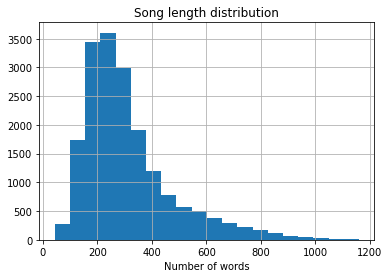

In [11]:
lyrics_len = np.array([len(lyr.split()) for lyr in lyrics_cleaner["lyrics"]])
plt.hist(lyrics_len, bins=20);
plt.title("Song length distribution")
plt.grid()
plt.xlabel("Number of words");

In [12]:
# let's check longest and shortest
print("SHORTEST : ", lyrics_cleaner["lyrics"][np.argmin(lyrics_len)])    # need to remove Spanish later on
print("\nLONGEST : ", lyrics_cleaner["lyrics"][np.argmax(lyrics_len)])

SHORTEST :  Corazon--mi corazon. Corazon--mi corazon. Yo te quiero--mi corazon. Corazon--mi corazon. Yo te quiero--mi corazon. Corazon--mi corazon. Yo te quiero--mi corazon. Espero que tu me quieras tambien. Corazon. Corazon--mi Corazon. Corazon--mi Corazon. Ayudame--mi Corazon. Yo te quiero--mi Corazon. Ayudame, te quiero, te quiero. Corazon

LONGEST :  Shimmy shimmy cocoa-pop. Shimmy shimmy cocoa-pop. Shimmy shimmy cocoa-pop. Shimmy shimmy cocoa-pop. We-we chocolate cross-over. Yea, we chocolate cross-over. See me cocoa might go pop. I'm cocoa and I might go pop. Now it's about time that I cleared this. So pardon me miss. But I'd like for you to hear this. If you kiss me then I'll kiss you back. You see, I feel real good inside, and it's just from your nearness. There's no need for you to fear this. Kiss me, I'll kiss you back. Mmmm-. Well ya look kinda cute to me. I think we can achieve this. Plus you act like you need this. Kiss me and I'll kiss you back. You act real fly. Money-B'

# 2) add song metadata

now we add song metadata and acoustic features to our Pandas dataframe

In [13]:
df_concat = lyrics_cleaner.copy()
df_concat["explicit"] = df_songs_meta["explicit"].astype(int)
df_concat["artists_dict"] = df_songs_meta["artists"]
df_concat["song_name"] = df_songs_meta["song_name"]
df_concat["song_popularity"] = df_songs_meta["popularity"]
df_concat["release_date"] = df_tracks_meta["release_date"]

acoustic_features = ["mode", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo"]
for af in acoustic_features:
    df_concat[af] = df_acoustic_features[af]

print(df_concat.shape)
df_concat.head()

(18353, 16)


,lyrics,explicit,artists_dict,song_name,song_popularity,release_date,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
song_id,,,,,,,,,,,,,,,,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...,1,{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},"thank u, next",86,2019-02-08,1,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...,1,{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},Without Me,87,2018-10-04,1,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'...",1,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},SICKO MODE,85,2018-08-03,1,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes...",0,{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},High Hopes,86,2018-06-22,1,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...,0,{'4iHNK0tOyZPYnBU7nGAgpQ': 'Mariah Carey'},All I Want for Christmas Is You,63,1994-11-01,1,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277


In [14]:
# clean song title
def get_title(n):
    return n.split(" - ")[0]

song_names_full = df_concat["song_name"]
# print(song_names_full)
song_names = [get_title(n) for n in song_names_full]
# print(song_names)
df_concat["song_name"] = song_names

replace exact release data with release year

In [15]:
def get_year(date):
    return int(date[:4])


release_dates = df_concat["release_date"]
# print(release_dates)
years = [get_year(date) for date in release_dates]
# print(years)

df_concat["release_year"] = years
df_concat = df_concat.drop(columns=["release_date"])
df_concat.head()

,lyrics,explicit,artists_dict,song_name,song_popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_year
song_id,,,,,,,,,,,,,,,,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...,1,{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},"thank u, next",86,1,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,2019
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...,1,{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},Without Me,87,1,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,2018
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'...",1,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},SICKO MODE,85,1,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,2018
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes...",0,{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},High Hopes,86,1,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,2018
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...,0,{'4iHNK0tOyZPYnBU7nGAgpQ': 'Mariah Carey'},All I Want for Christmas Is You,63,1,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277,1994


# 3) get genre from artist metadata

In [16]:
try:
    df_artists_meta = df_artists_meta.set_index('artist_id')
except:
    # already done
    pass

In [17]:
df_artists_meta.head(10)

,name,followers,popularity,artist_type,main_genre,genres,image_url
artist_id,,,,,,,
66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,34554242,96,singer,dance pop,"['dance pop', 'pop', 'post-teen pop']",https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...
26VFTg2z8YR0cCuwLzESi2,Halsey,7368242,90,singer,dance pop,"['dance pop', 'electropop', 'etherpop', 'indie...",https://i.scdn.co/image/22a5f3d8c42bc7cb55215e...
0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,6313709,94,rapper,pop,"['pop', 'pop rap', 'rap']",https://i.scdn.co/image/dc5eba5e032c2e5bc4d42c...
246dkjvS1zLTtiykXe5h60,Post Malone,16737002,96,rapper,dfw rap,"['dfw rap', 'pop', 'rap']",https://i.scdn.co/image/f9d8b742b66609f12da023...
1zNqQNIdeOUZHb8zbZRFMX,Swae Lee,483032,89,singer,trap music,['trap music'],https://i.scdn.co/image/a177469870b41f7e17e3b5...
64KEffDW9EtZ1y2vBYgq8T,Marshmello,15566666,91,DJ,brostep,"['brostep', 'progressive electro house']",https://i.scdn.co/image/65f40b9a99ebb96921d536...
7EQ0qTo7fWT7DPxmxtSYEc,Bastille,3776115,85,band,metropopolis,"['metropopolis', 'modern rock', 'pop', 'tropic...",https://i.scdn.co/image/7fd538c4aa21542d840e17...
20JZFwl6HVl6yg8a4H3ZqK,Panic! At The Disco,7749228,88,band,baroque pop,"['baroque pop', 'emo', 'modern rock', 'pop punk']",https://i.scdn.co/image/58518a04cdd1f20a24cf05...
4iHNK0tOyZPYnBU7nGAgpQ,Mariah Carey,4682308,81,singer,dance pop,"['dance pop', 'pop', 'r&b', 'urban contemporary']",https://i.scdn.co/image/b9e312cf57cca3fab33e3d...


In [18]:
def get_artists(artist_dict, i=0):
    artist_dict = ast.literal_eval(artist_dict)
    artists = list(artist_dict.values())
    if "Unknown" in artists:
        artists.remove("Unknown")
    return artists

def get_artist(n):
    # just take first artist
    return n[0]

def get_genres(artist_dict, i=0):
    artist_dict = ast.literal_eval(artist_dict)
    artist_keys = list(artist_dict.keys())
    genres = []
    for artist in artist_keys:
        try:
            genres += ast.literal_eval(df_artists_meta.loc[artist]["genres"])
        except:
            # not in artist metadata
            continue
    if len(genres) == 0:
        genres = np.nan
    return genres

def get_main_genre(artist_dict, i=0):
    artist_dict = ast.literal_eval(artist_dict)
    artist_keys = list(artist_dict.keys())
    main_genre = []
    for artist in artist_keys:
        try:
            artist_main_genre = df_artists_meta.loc[artist]["main_genre"]
            if artist_main_genre != "-":
                main_genre.append(artist_main_genre)
        except:
            # not in artist metadata
            continue
    if len(main_genre) == 0:
        main_genre = np.nan
    return main_genre


artist_dicts = df_concat["artists_dict"]
artists = [get_artists(artist_dict, i) for i, artist_dict in enumerate(artist_dicts)]
genres = [get_genres(artist_dict, i) for i, artist_dict in enumerate(artist_dicts)]
h = np.sum([1 if g is np.nan else 0  for g in genres])
print(f"number of songs with no genre : {h}")
main_genre = [get_main_genre(artist_dict, i) for i, artist_dict in enumerate(artist_dicts)]
h = np.sum([1 if g is np.nan else 0  for g in main_genre])
print(f"number of songs with no main genre : {h}")

# add columns to main dataframe
df_concat["artists"] = artists
df_concat["artist"] = [get_artist(n) for n in df_concat["artists"]]
df_concat["genres"] = genres
df_concat["main_genre"] = main_genre
df_concat.head()

number of songs with no genre : 1468
number of songs with no main genre : 1468


,lyrics,explicit,artists_dict,song_name,song_popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_year,artists,artist,genres,main_genre
song_id,,,,,,,,,,,,,,,,,,,,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...,1,{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},"thank u, next",86,1,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,2019,[Ariana Grande],Ariana Grande,"[dance pop, pop, post-teen pop]",[dance pop]
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...,1,{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},Without Me,87,1,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,2018,[Halsey],Halsey,"[dance pop, electropop, etherpop, indie poptim...",[dance pop]
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'...",1,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},SICKO MODE,85,1,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,2018,[Travis Scott],Travis Scott,"[pop, pop rap, rap]",[pop]
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes...",0,{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},High Hopes,86,1,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,2018,[Panic! At The Disco],Panic! At The Disco,"[baroque pop, emo, modern rock, pop punk]",[baroque pop]
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...,0,{'4iHNK0tOyZPYnBU7nGAgpQ': 'Mariah Carey'},All I Want for Christmas Is You,63,1,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277,1994,[Mariah Carey],Mariah Carey,"[dance pop, pop, r&b, urban contemporary]",[dance pop]


In [19]:
print(f"before : {len(df_concat)}")
df_concat = df_concat.dropna()
print(f"after : {len(df_concat)}")

before : 18353
after : 16885


# 4) clean up genres

way too many genres (461) that we will condense to 8 for our finetuning task

In [20]:
main_genre = df_concat["main_genre"]
main_genre = [g[0] for g in main_genre]
main_genre = pd.Series(main_genre)
print(main_genre.value_counts())

album rock                 2146
dance pop                  1628
adult standards            1562
contemporary country       1160
classic soul                815
                           ... 
hyphy                         1
indie shoegaze                1
irish singer-songwriter       1
manitoba indie                1
finnish rockabilly            1
Length: 461, dtype: int64


In [21]:
# can group sub-genres
idx = ["soul" in g for g in main_genre]
main_genre.loc[idx].value_counts()

classic soul          815
chicago soul          124
british soul           60
northern soul          47
neo soul               37
southern soul           7
memphis soul            5
philly soul             5
soul                    4
soul jazz               3
deep southern soul      2
deep northern soul      2
neo soul-jazz           1
trap soul               1
dtype: int64

complicated logic to condense genres...

In [22]:
### https://www.musicianwave.com/top-music-genres/
genres = ["dance/electronic", "dance pop", "adult standards", "hip-hop/rap", "religious", "boy band", "r&b", "pop rap", "soft rock",
          "rock", "pop", "acoustic/folk", "soul/funk", "country", "jazz/blues/funk", "pop rock", "classic rock",
          "electronic/house", "karaoke", "modern rock", "soul/disco", "funk",
          "alternative/punk", "reggae", "christmas", "latin", "christian", "movie", "disco", "hard rock/metal"]
genre_mapping = {}
for i, g in enumerate(genres):
    genre_mapping[g] = i


df_less_genre = df_concat.copy()

mask = np.logical_or(np.logical_or(np.logical_or(np.logical_or(
    ["techno" in str(g) for g in df_less_genre['genres']],
    ["house" in str(g) for g in df_less_genre['genres']]
), ["edm" in str(g) for g in df_less_genre['genres']]), 
["electronic" in str(g) for g in df_less_genre['genres']]), 
["step" in str(g) for g in df_less_genre['main_genre']])

mask = np.logical_or(mask, ["dance pop" in str(g) for g in df_less_genre['main_genre']])
print("dance pop", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["dance pop"]
df_less_genre.loc[mask, "genres"] = genre_mapping["dance pop"]

        
mask = np.logical_or(np.logical_or(
    ["new jack swing" in str(g) for g in df_less_genre['genres']],
    ["girl group" in str(g) for g in df_less_genre['genres']]
), ["r&b" in str(g) for g in df_less_genre['genres']])
# ), ["soul" in str(g) for g in df_less_genre['genres']])       
print("r&b", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["r&b"]
df_less_genre.loc[mask, "genres"] = genre_mapping["r&b"]



mask = np.logical_or(np.logical_or(np.logical_or(
    ["rap" in str(g) for g in df_less_genre['genres']],
    ["hop" in str(g) for g in df_less_genre['main_genre']]
), ["g funk" in str(g) for g in df_less_genre['main_genre']]
), ["freestyle" in str(g) for g in df_less_genre['main_genre']])
print("hip-hop", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["hip-hop/rap"]
df_less_genre.loc[mask, "genres"] = genre_mapping["hip-hop/rap"]


mask = np.logical_or(np.logical_or(["soul" in str(g) for g in df_less_genre['genres']],
["disco" in str(g) for g in df_less_genre['main_genre']]), ["funk" in str(g) for g in df_less_genre['main_genre']])
print("soul/disco", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["soul/disco"]
df_less_genre.loc[mask, "genres"] = genre_mapping["soul/disco"]


# acoustic
mask = np.logical_or(
    ["acoustic" in str(g) for g in df_less_genre['main_genre']],
    ["folk" in str(g) for g in df_less_genre['main_genre']]
)
# mask = ["folk" in str(g) for g in df_less_genre['genres']]
print("acoustic/folk", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["acoustic/folk"]
df_less_genre.loc[mask, "genres"] = genre_mapping["acoustic/folk"]


# country music
mask = np.logical_or(np.logical_or(
#     ["country" in str(g) for g in df_less_genre['main_genre']],
    ["country" in str(g) for g in df_less_genre['genres']],
    ["southern" in str(g) for g in df_less_genre['main_genre']]
), ["bluegrass" in str(g) for g in df_less_genre['main_genre']])
print("country", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["country"]
df_less_genre.loc[mask, "genres"] = genre_mapping["country"]


# rock
mask = np.logical_or(
    ["rock" in str(g) for g in df_less_genre['main_genre']],
    ["metal" in str(g) for g in df_less_genre['genres']]
)
mask = np.logical_or(mask, np.logical_or(
    ["alternative" in str(g) for g in df_less_genre['genres']],
    ["punk" in str(g) for g in df_less_genre['genres']]
))
mask = np.logical_or(mask,
    ["album rock" in str(g) for g in df_less_genre['genres']]
)
# mask = ["rock" in str(g) for g in df_less_genre['main_genre']]
print("rock", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["rock"]
df_less_genre.loc[mask, "genres"] = genre_mapping["rock"]


mask = np.logical_or(np.logical_or(np.logical_or(np.logical_or(
    ["pop rock" in str(g) for g in df_less_genre['main_genre']],
    ["permanent wave" in str(g) for g in df_less_genre['main_genre']]
), ["soft rock" in str(g) for g in df_less_genre['main_genre']]
), ["neo mellow" in str(g) for g in df_less_genre['main_genre']]
), ["pop rock" in str(g) for g in df_less_genre['genres']]
)
mask = np.logical_or(np.logical_or(
    ["pop" in str(g) for g in df_less_genre['main_genre']],
    ["boy band" in str(g) for g in df_less_genre['genres']]
), mask)
mask = np.logical_or(np.logical_or(np.logical_or(np.logical_or(
    ["brill building pop" in str(g) for g in df_less_genre['main_genre']],
    ["easy" in str(g) for g in df_less_genre['main_genre']]
), ["adult standards" in str(g) for g in df_less_genre['main_genre']]
), ["british invasion" in str(g) for g in df_less_genre['main_genre']]
), mask)
df_less_genre.loc[mask, "main_genre"] = genre_mapping["adult standards"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["adult standards"]
print("pop", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["pop"]
df_less_genre.loc[mask, "genres"] = genre_mapping["pop"]



mask = ["dance pop" in str(g) for g in df_less_genre['genres']]
print("dance pop", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["dance pop"]
df_less_genre.loc[mask, "genres"] = genre_mapping["dance pop"]

# acoustic
mask = np.logical_or(
    ["acoustic" in str(g) for g in df_less_genre['genres']],
    ["folk" in str(g) for g in df_less_genre['genres']]
)
# mask = ["folk" in str(g) for g in df_less_genre['genres']]
print("acoustic/folk", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["acoustic/folk"]
df_less_genre.loc[mask, "genres"] = genre_mapping["acoustic/folk"]



# print value count
min_songs = 100

main_genre = df_less_genre["main_genre"].values
vals = []
for g in main_genre:
    if isinstance(g, list):
        vals += g
    else:
        vals += [genres[g]]
h = pd.Series(vals).value_counts()
# print(h[::-1][:100])
mask = (h >= min_songs).values
n_genres = np.sum(mask)
print(f"\n{n_genres} genres with at least {min_songs} songs\n")
print(h[:n_genres])

dance pop 2076
r&b 972
hip-hop 1472
soul/disco 2339
acoustic/folk 319
country 2412
rock 3476
pop 2774
dance pop 6
acoustic/folk 17

10 genres with at least 100 songs

rock             3476
pop              2774
country          2412
soul/disco       2339
dance pop        2082
hip-hop/rap      1472
r&b               972
acoustic/folk     336
karaoke           327
hollywood         103
dtype: int64


In [23]:
# remove obscure genres
mask = np.array(
    [isinstance(g, list) for g in df_less_genre['main_genre']],
)
print("unclassified songs", sum(mask))
df_less_genre.loc[mask, "main_genre"] = np.nan

unclassified songs 1022


In [24]:
print(f"before : {len(df_less_genre)}")
df_clean = df_less_genre.dropna()
print(f"after : {len(df_clean)}")


def get_genre(n):
    return genres[n]


df_clean["genre"] = [get_genre(n) for n in df_clean["main_genre"]]


# df_clean = df_clean.drop(columns=['genres', 'main_genre', "artists_dict", "artists"])
df_clean = df_clean.drop(columns=['main_genre', "artists_dict", "artists", "genres"])


before : 16885
after : 15863


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [25]:
# h = df_clean[(df_clean["genre"] == "rock")]["artist"].value_counts()
# print(h[h > 15])

In [26]:
# df_clean[df_clean["artist"] == "George Michael"]

# 5) visualization

In [27]:
import matplotlib

FONTSIZE = 30
matplotlib.rc('font', size=FONTSIZE)
matplotlib.rc('axes', titlesize=FONTSIZE)

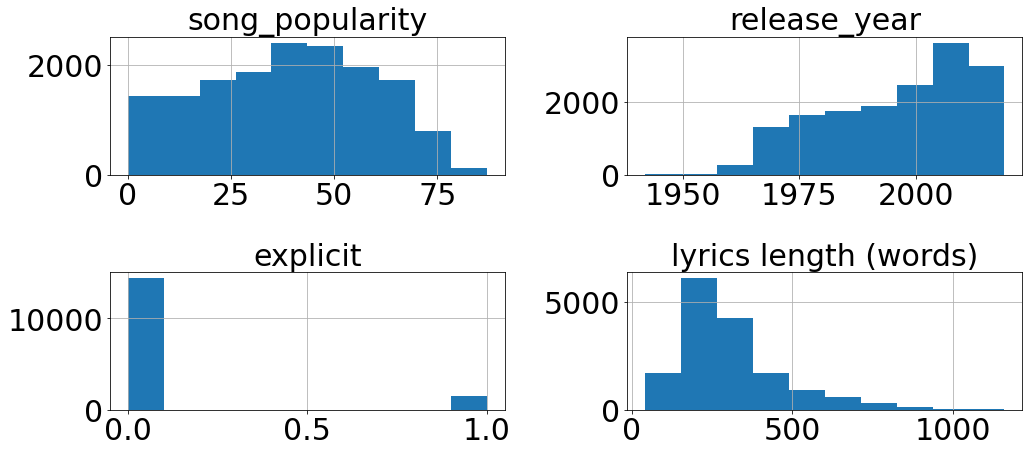

In [28]:
# ax = df_clean.hist(column=["song_popularity", "release_year", "explicit"], figsize=(15, 10));
f, ax = plt.subplots(2, 2, figsize=(15, 7))
ax[0, 0].hist(df_clean["song_popularity"])
ax[0, 0].set_title("song_popularity")
ax[0, 1].hist(df_clean["release_year"])
ax[0, 1].set_title("release_year")
ax[1, 0].hist(df_clean["explicit"])
ax[1, 0].set_title("explicit")

lyrics_len = np.array([len(lyr.split()) for lyr in df_clean["lyrics"]])
ax[1, 1].hist(lyrics_len)
ax[1, 1].set_title("lyrics length (words)")
for _ax in ax.flatten():
    _ax.grid()
f.tight_layout();

In [29]:
print(len(df_clean["genre"].value_counts()))
df_clean["genre"].value_counts()

8


rock             3476
pop              2774
country          2412
soul/disco       2339
dance pop        2082
hip-hop/rap      1472
r&b               972
acoustic/folk     336
Name: genre, dtype: int64

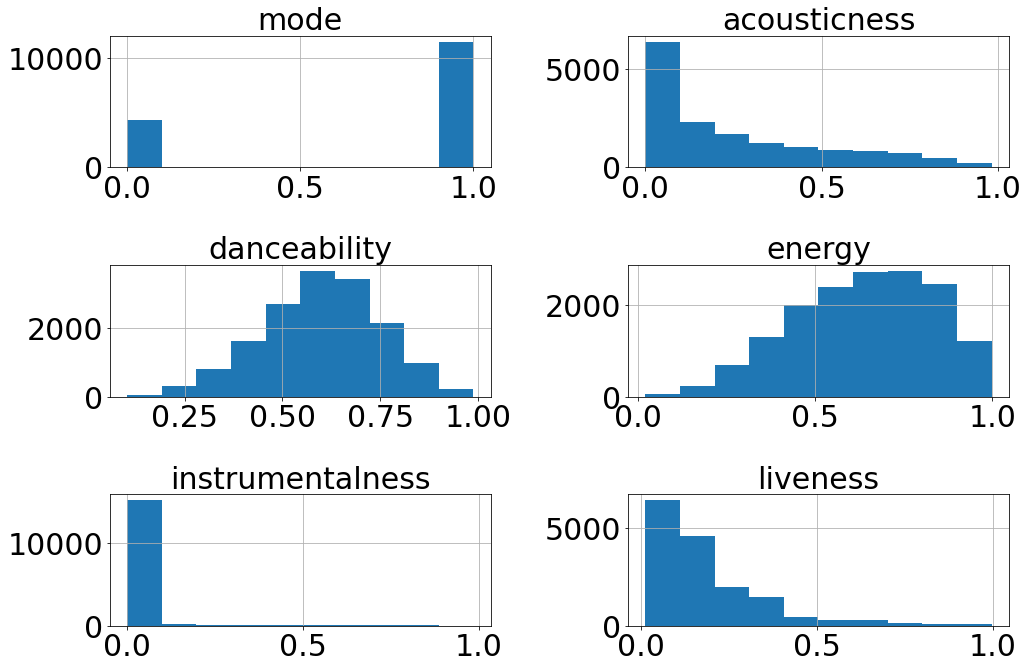

In [30]:
df_clean.hist(column=acoustic_features[:6], figsize=(15, 10));
f = plt.gcf()
f.tight_layout();

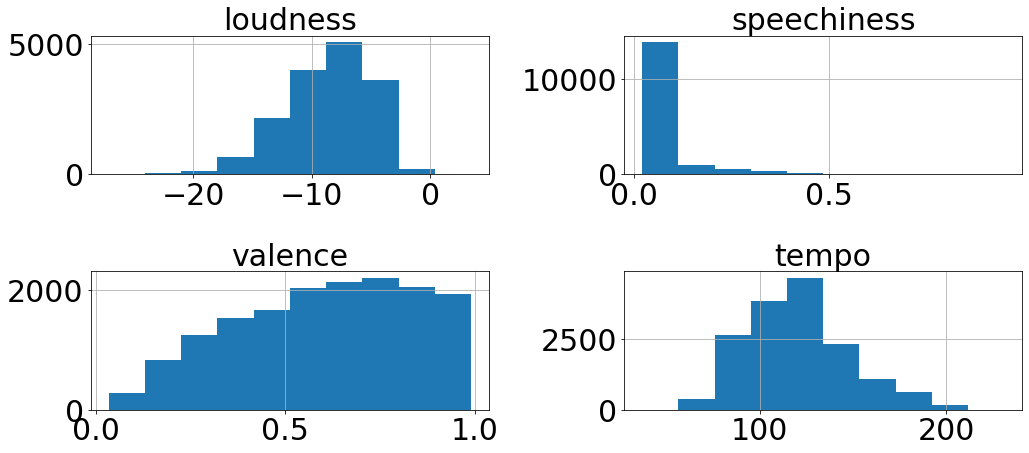

In [31]:
df_clean.hist(column=acoustic_features[6:], figsize=(15, 7));
f = plt.gcf()
f.tight_layout();

# 6) save to pickle

In [32]:
# df_clean.to_pickle('df_clean_v4_14122021_py35.pkl')

# 7) embedding similarity

In [4]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util


def print_cos_sim_pairs(embeddings, song_names):
    #Compute cosine-similarits
    cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

    #Find the pairs with the highest cosine similarity scores
    pairs = []
    for i in range(len(cosine_scores)-1):
        for j in range(i+1, len(cosine_scores)):
            pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

    #Sort scores in decreasing order
    pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

    for pair in pairs:
        i, j = pair['index']
        print(f"Score: {pair['score']:.4f} \t {song_names[i]:35s} {song_names[j]:35s}")


df_clean = pd.read_pickle("df_clean_v4_14122021_py35.pkl")
print(df_clean.shape)
df_clean.head()

(15863, 17)


,lyrics,explicit,song_name,song_popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_year,artist,genre
song_id,,,,,,,,,,,,,,,,,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...,1,"thank u, next",86,1,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,2019,Ariana Grande,dance pop
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...,1,Without Me,87,1,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,2018,Halsey,dance pop
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'...",1,SICKO MODE,85,1,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,2018,Travis Scott,hip-hop/rap
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes...",0,High Hopes,86,1,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,2018,Panic! At The Disco,rock
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...,0,All I Want for Christmas Is You,63,1,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277,1994,Mariah Carey,dance pop


## explore similarities with Eminem and Christmas songs

In [2]:
print("xmas")
set1 = df_clean[["Christmas" in  n for n in df_clean["song_name"]]]
xmas = list(set1["lyrics"][:3].values)
xmas_names = list(set1["song_name"][:3].values)
print(xmas_names)
# print([len(lyr) for lyr in xmas])
print([len(lyr.split(" ")) for lyr in xmas])

print("\nrap")
# set2 = df_clean[df_clean["genre"] == "hip-hop/rap"]
set2 = df_clean[df_clean["artist"] == "Eminem"]
rap = list(set2["lyrics"][:3].values)
rap_names = list(set2["song_name"][:3].values)
print(rap_names)
# print([len(lyr) for lyr in xmas])
print([len(lyr.split(" ")) for lyr in xmas])

# concat
song_names = xmas_names + rap_names
song_lyrics = xmas + rap

xmas
['All I Want for Christmas Is You', "Rockin' Around The Christmas Tree", 'A Holly Jolly Christmas']
[369, 122, 86]

rap
['Killshot', 'Fall', 'Kamikaze']
[369, 122, 86]


## try a few pretrained models from https://www.sbert.net/docs/pretrained_models.html

In [5]:
# https://huggingface.co/sentence-transformers/all-mpnet-base-v2
mpnet_base = SentenceTransformer('all-mpnet-base-v2')    # reported max length of 384
print_cos_sim_pairs(mpnet_base.encode(song_lyrics), song_names)

Score: 0.6664 	 Killshot                            Fall                               
Score: 0.5865 	 Rockin' Around The Christmas Tree   A Holly Jolly Christmas            
Score: 0.5730 	 All I Want for Christmas Is You     A Holly Jolly Christmas            
Score: 0.5000 	 Killshot                            Kamikaze                           
Score: 0.4975 	 All I Want for Christmas Is You     Rockin' Around The Christmas Tree  
Score: 0.4630 	 Fall                                Kamikaze                           
Score: 0.2689 	 All I Want for Christmas Is You     Kamikaze                           
Score: 0.2473 	 A Holly Jolly Christmas             Kamikaze                           
Score: 0.2420 	 Rockin' Around The Christmas Tree   Kamikaze                           
Score: 0.2245 	 All I Want for Christmas Is You     Killshot                           
Score: 0.1994 	 All I Want for Christmas Is You     Fall                               
Score: 0.1867 	 Rockin' Around T

In [19]:
# see truncation
h1 = mpnet_base.encode(rap[0])
for n in range(220, 270, 5):
    h2 = mpnet_base.encode(" ".join(rap[0].split()[:n]))
    print(n, np.linalg.norm(h1 - h2))

220 0.16137485
225 0.1400136
230 0.12393427
235 0.110358976
240 0.08966823
245 0.0
250 0.0
255 0.0
260 0.0
265 0.0


In [8]:
# https://huggingface.co/sentence-transformers/all-distilroberta-v1
distilroberta_base = SentenceTransformer('all-distilroberta-v1')    # reported max length of 512
print_cos_sim_pairs(distilroberta_base.encode(song_lyrics), song_names)

Score: 0.7693 	 Killshot                            Fall                               
Score: 0.7468 	 Fall                                Kamikaze                           
Score: 0.6863 	 Killshot                            Kamikaze                           
Score: 0.6527 	 Rockin' Around The Christmas Tree   A Holly Jolly Christmas            
Score: 0.6058 	 All I Want for Christmas Is You     Rockin' Around The Christmas Tree  
Score: 0.5841 	 All I Want for Christmas Is You     A Holly Jolly Christmas            
Score: 0.3199 	 All I Want for Christmas Is You     Kamikaze                           
Score: 0.3125 	 All I Want for Christmas Is You     Fall                               
Score: 0.3115 	 All I Want for Christmas Is You     Killshot                           
Score: 0.1978 	 Rockin' Around The Christmas Tree   Kamikaze                           
Score: 0.1853 	 Rockin' Around The Christmas Tree   Killshot                           
Score: 0.1840 	 A Holly Jolly Ch

In [16]:
# see truncation
h1 = distilroberta_base.encode(rap[0])
for n in range(300, 350, 5):
    h2 = distilroberta_base.encode(" ".join(rap[0].split()[:n]))
    print(n, np.linalg.norm(h1 - h2))

300 0.2710807
305 0.26396433
310 0.25831133
315 0.25092298
320 0.25006667
325 0.17305498
330 0.13102086
335 0.0
340 0.0
345 0.0


In [11]:
# https://huggingface.co/sentence-transformers/all-MiniLM-L12-v2
minilm_base = SentenceTransformer('all-MiniLM-L12-v2')    # reported max length of 512
print_cos_sim_pairs(minilm_base.encode(song_lyrics), song_names)

Score: 0.6461 	 Rockin' Around The Christmas Tree   A Holly Jolly Christmas            
Score: 0.4276 	 All I Want for Christmas Is You     Rockin' Around The Christmas Tree  
Score: 0.4017 	 All I Want for Christmas Is You     A Holly Jolly Christmas            
Score: 0.3410 	 Killshot                            Fall                               
Score: 0.3395 	 Rockin' Around The Christmas Tree   Fall                               
Score: 0.3287 	 Killshot                            Kamikaze                           
Score: 0.3027 	 All I Want for Christmas Is You     Fall                               
Score: 0.2834 	 Fall                                Kamikaze                           
Score: 0.2356 	 A Holly Jolly Christmas             Fall                               
Score: 0.1839 	 Rockin' Around The Christmas Tree   Killshot                           
Score: 0.1770 	 A Holly Jolly Christmas             Kamikaze                           
Score: 0.1701 	 Rockin' Around T

In [14]:
# see truncation
h1 = minilm_base.encode(rap[0])
for n in range(50, 100, 5):
    h2 = minilm_base.encode(" ".join(rap[0].split()[:n]))
    print(n, np.linalg.norm(h1 - h2))

50 0.5282787
55 0.400616
60 0.35201874
65 0.28573197
70 0.2671747
75 0.15837097
80 0.0
85 0.0
90 0.0
95 0.0


`all-mpnet-base-v2` and `all-distilroberta-v1` perform quite well. `all-distilroberta-v1` seems to take longer text.